### Importing Packages

In [1]:
# Common imports

import numpy as np
import pandas as pd
import matplotlib as mpl




# To make the notebook's output stable across runs

np.random.seed(42)



# Plotting figures

%matplotlib inline
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


# Ignore useless warnings

import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [2]:
# Importing Logistic Regression model

from sklearn.linear_model import LogisticRegression

### Loading the datasets

In [3]:
from tensorflow.keras.datasets import fashion_mnist

In [4]:
(X_train_1, y_train_1), (X_test_1, y_test_1) = fashion_mnist.load_data()

In [5]:
X_train_1 = X_train_1.reshape(60000, 784)
X_test_1 = X_test_1.reshape(10000, 784)

Checking for unknown inputs in training and testing datasets

In [6]:
c = 'False'
a = pd.DataFrame(X_train_1)
for i in range(0, 784):
    if a.iloc[:, i].isnull().values.any() == True:
        c = True
        break
print("Is any value in training data unknown =", c)

c = 'False'
b = pd.DataFrame(X_test_1)
for i in range(0, 784):
    if b.iloc[:, i].isnull().values.any() == True:
        c = True
        break
print("Is any value in testing data unknown =", c)

Is any value in training data unknown = False
Is any value in testing data unknown = False


There is no unknown value in our datasets. So we can move to further preprocessing.

Normalizing the datasets

In [7]:
X_train_1 = X_train_1/255
X_test_1 = X_test_1/255

Splitting the training data further into training and validation set.

The splitting is done so that we work with only the given training data beforehand and prevent optimizing our model with respect to the given testing data. This prevents overfitting of model with respect to the testing data.

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train_1, y_train_1, test_size=0.30, random_state=42)

#### Logistic Regression on training dataset

In [9]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=50, random_state=42)
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

c:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8557222222222223

In [10]:
print('Number of iterations =', log_reg.n_iter_[0])

Number of iterations = 50


In [11]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=500, random_state=42)
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

c:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8526111111111111

In [12]:
print('Number of iterations =', log_reg.n_iter_[0])

Number of iterations = 500


The logistic regression does not converge, even at higher maximum iterations. But as we increase max_iter, the score didn't deviated much from 84% to 85%. Hence a smaller magnitude of maximum iterations will suffice.

### Clustering

In [13]:
# Number of clusters = k

k = 450

In [14]:
from sklearn.cluster import KMeans

In [15]:
kmeans = KMeans(n_clusters=k, init='k-means++', n_init=1,
                max_iter=100, random_state=42, )
kmeans.fit(X_train)
X_digits_dist = kmeans.transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis = 0)
X_representative_digits = X_train[representative_digit_idx, :]
X_representative_digits_np = X_representative_digits

In [16]:
print('Inertia =', kmeans.inertia_)
print('Number of iterations =', kmeans.n_iter_)

Inertia = 682444.3507616427
Number of iterations = 56


In [17]:
# This is the step where manual labelling on representative elements occurs.
# The amount of data to be manually labelled is the number of clusters used for clustering.
# Since we already had all elements labelled, we are directly using the labels for these representative elements from the dataset.

y_representative_digits = y_train[representative_digit_idx]

In [18]:
clf_reg_2 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=300, random_state=42)
clf_reg_2.fit(X_representative_digits, y_representative_digits)
clf_reg_2.score(X_test, y_test)

0.7928333333333333

Propagating the labells to entire dataset

In [19]:
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]

In [20]:
clf_reg_3 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=300, random_state=1)
clf_reg_3.fit(X_train, y_train_propagated)
clf_reg_3.score(X_test, y_test)

c:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7806666666666666

In [21]:
print('Number of iterations =', clf_reg_3.n_iter_[0])

Number of iterations = 300


Propagating the labells to closest 1% of each cluster from their respective centroids.

In [22]:
percentile_closest = 1

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

This number below tells the fraction of labelles propagated that have the correct label.

In [23]:
np.mean(y_train_partially_propagated == y_train[partially_propagated])

0.9521531100478469

In [24]:
clf_reg_4 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=500, random_state=42)
clf_reg_4.fit(X_train_partially_propagated, y_train_partially_propagated)
clf_reg_4.score(X_test, y_test)

0.7847777777777778

To prevent writing the same program for different number of clusters, we define a function (k_cluster) below that takes in the number of clusters (k) and percentage of propagation (p) and gives all the above outputs.

In [25]:
def k_cluster_1(k, p):
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=1
                    , random_state=42, )
    kmeans.fit(X_train)
    X_digits_dist = kmeans.transform(X_train)
    representative_digit_idx = np.argmin(X_digits_dist, axis = 0)
    X_representative_digits = X_train[representative_digit_idx]
    X_representative_digits_np = X_representative_digits
    
    y_representative_digits = y_train[representative_digit_idx]
    
    log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=50, random_state=42)
    log_reg.fit(X_representative_digits, y_representative_digits)
    print('Accuracy with', k, 'clusters =', log_reg.score(X_test, y_test))
    
    y_train_propagated = np.empty(len(X_train), dtype=np.int32)
    for i in range(k):
        y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]
    
    log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=50, random_state=1)
    log_reg.fit(X_train, y_train_propagated)
    print('Accuracy with labells propagated =', log_reg.score(X_test, y_test))
    
    percentile_closest = p
    
    X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
    for i in range(k):
        in_cluster = (kmeans.labels_ == i)
        cluster_dist = X_cluster_dist[in_cluster]
        cutoff_distance = np.percentile(cluster_dist, percentile_closest)
        above_cutoff = (X_cluster_dist > cutoff_distance)
        X_cluster_dist[in_cluster & above_cutoff] = -1
    
    partially_propagated = (X_cluster_dist != -1)
    X_train_partially_propagated = X_train[partially_propagated]
    y_train_partially_propagated = y_train_propagated[partially_propagated]
    
    print('Accuracy of percentage labels with actual labels =', np.mean(y_train_partially_propagated == y_train[partially_propagated]))
    
    log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=50, random_state=42)
    log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
    print('Accuracy with labells propagated to nearest', str(p)+'% elements =', log_reg.score(X_test, y_test))

In [26]:
k_cluster_1(450, 20)

c:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy with 450 clusters = 0.7932222222222223


c:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy with labells propagated = 0.7815555555555556
Accuracy of percentage labels with actual labels = 0.8441724941724942


c:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy with labells propagated to nearest 20% elements = 0.7804444444444445


This reduces the effort of changing the number of clusters each time. But still, this method does not gives us the optimal number of clusters to use in building our semi-supervised learning model. Also, we don't know any optimal method to declare what number of clusters should be considered 'ideal'.

The problem is as follows:$\\$


If we take very few clusters, we will be having very less information (labelled data) and a large amount of unknown (unlabelled data). Thus if we train our model using clustering on these labels, we would get relatively very less accuracy as we were getting from using the entire training dataset.$\\$
On the other hand, if we take very large number of clusters (relative to number of elements in training data), then surely our accuracy after clustering should be good (very close to the one on entire training dataset). But then as number of clusters have increased, the number of labelled data have increased. Thus the cost of making this model increases, since then we have to make sure we have a large amount of manually labelled data.

So we have to take the number of clusters neither too small nor too large, but someway in between, providing the lowest payoff between accuracy and cost of making the model.$\\$
This looks a hard work to do and we don't know where to even start.

In such a case, plotting seems to be a promosing approach, since we just have to purturb the number of clusters and find the accuracy on the representative elements. We can plot an 'Accuracy Vs Number_of_clusters' graph from this. This should give us some hint on how to find a suitable number of clusters.

In [27]:
scores = []

In [28]:
def f(x, y, n):
    for k in range(x, y+1, n):
        kmeans = KMeans(n_clusters=k, init='k-means++', n_init=1
                        , random_state=42, )
        kmeans.fit(X_train)
        X_digits_dist = kmeans.transform(X_train)
        representative_digit_idx = np.argmin(X_digits_dist, axis = 0)
        X_representative_digits = X_train[representative_digit_idx]
        X_representative_digits_np = X_representative_digits
        
        y_representative_digits = y_train[representative_digit_idx]
        
        log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=50, random_state=42)
        log_reg.fit(X_representative_digits, y_representative_digits)
        scores.append(log_reg.score(X_test, y_test))

In [29]:
# Finding the accuracy for each cluster between 50 to 1000, with consecutive difference of 50 clusters.
# This will take some time to run. But once compiled, we can use this data immediately to plot our graph.

f(50, 1000, 50)

c:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

In [30]:
for i in range(len(scores)):
    print((i+1)*50 , "->", scores[i])

50 -> 0.6699444444444445
100 -> 0.7016666666666667
150 -> 0.7375555555555555
200 -> 0.7605555555555555
250 -> 0.7755
300 -> 0.7714444444444445
350 -> 0.775
400 -> 0.7807777777777778
450 -> 0.7932222222222223
500 -> 0.8008333333333333
550 -> 0.8014444444444444
600 -> 0.8026111111111112
650 -> 0.8023333333333333
700 -> 0.7972777777777778
750 -> 0.7993333333333333
800 -> 0.7984444444444444
850 -> 0.7982222222222223
900 -> 0.8036111111111112
950 -> 0.8071666666666667
1000 -> 0.8033333333333333


In [31]:
# Arranging the number of clusters in decreasing order of their accuracy.

50 + (np.argsort(scores)[::-1])*50

array([ 950,  900, 1000,  600,  650,  550,  500,  750,  800,  850,  700,
        450,  400,  250,  350,  300,  200,  150,  100,   50], dtype=int64)

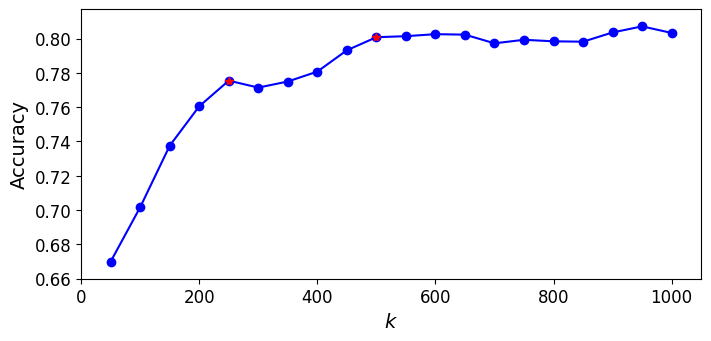

In [32]:
# Now time to plot our graph.

plt.figure(figsize=(8, 3.5))
plt.plot([n for n in range(50, 1001, 50)], scores, 'bo-')
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)

plt.axis([0, 1050, np.min(scores) - 0.01, np.max(scores) + 0.01])
plt.plot(250, scores[4], 'r*')
plt.plot(500, scores[9], 'r*')

plt.show()

From the above graph, it is not exactly clear which value of k to choose. We can choose k = 250 and justify that since after 250 clusters, there is a slight dip in accuracy, so increasing number of clusters beyond 250 will not be very feasible.$\\$
One could also use k = 500 with the same reasoning. In this case, the initial increase in accuracy with respect to number of cluster is increasing, although with a lower rate, but not at a rate which can be neglected (not an infeasible rate).

# Applying PCA before clustering

Now before clustering, we apply a step of dimensionality reduction, called the Principal Component Analysis, or PCA. This will reduce the number of dimensions of our dataset to a smaller dimension. Our dataset have $28 \times 28 = 784$ dimension. We reduce it to, say 25. Let's then apply two different models on this reduced dataset. One will be our earlier Logistic Regression and other will be Support Vector Machine, or SVM.

In [33]:
t = 25

In [34]:
from sklearn.decomposition import PCA

pca = PCA(n_components=t, random_state=42)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

## Logistic Regression

#### Logistic Regression on Entire training dataset

In [35]:
from sklearn.linear_model import LogisticRegression

clf_reg_5 = LogisticRegression(random_state=42, max_iter = 600)
clf_reg_5.fit(X_train_pca, y_train)
clf_reg_5.score(X_test_pca, y_test)

0.818

In [36]:
print('Number of iterations for regression model to converge =', clf_reg_5.n_iter_[0])

Number of iterations for regression model to converge = 565


The Logistic Regression converges within 600 iterations to give an accuracy of 81.8% on test data.

Note that the model takes relatively very less time to fit than earlier. This is because the number of attributes is now very few. Earlier there were 784 attributes, now there are just 25.

### Clustering

In [37]:
k = 450

In [38]:
kmeans = KMeans(n_clusters=k, init='k-means++', n_init=1,
                max_iter=100, random_state=42, )
kmeans.fit(X_train_pca)
X_digits_dist = kmeans.transform(X_train_pca)
representative_digit_idx = np.argmin(X_digits_dist, axis = 0)
X_representative_digits = X_train_pca[representative_digit_idx, :]

In [39]:
print('Inertia =', kmeans.inertia_)
print('Number of iterations =', kmeans.n_iter_)

Inertia = 213791.76707673236
Number of iterations = 58


In [40]:
X_representative_digits_np = np.array(X_representative_digits)

In [41]:
y_representative_digits = y_train[representative_digit_idx]

Accuracy on representative elements

In [42]:
clf_reg_6= LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=300, random_state=42)
clf_reg_6.fit(X_representative_digits, y_representative_digits)
clf_reg_6.score(X_test_pca, y_test)

0.7701111111111111

Accuracy for labells propagated to entire dataset

In [43]:
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]

In [44]:
clf_reg_7= LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=200, random_state=1)
clf_reg_7.fit(X_train_pca, y_train_propagated)
clf_reg_7.score(X_test_pca, y_test)

0.7744444444444445

In [45]:
print('Number of iterations for regression model to converge =', clf_reg_7.n_iter_[0])

Number of iterations for regression model to converge = 54


Accuracy on labells propagated to 1% of elements closest to each cluster.

In [46]:
percentile_closest = 1

X_cluster_dist = X_digits_dist[np.arange(len(X_train_pca)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train_pca[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

The number below gives the fraction of propagated data points that have the correct labels

In [47]:
np.mean(y_train_partially_propagated == y_train[partially_propagated])

0.9587301587301588

In [48]:
clf_reg_8 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=2000, random_state=42)
clf_reg_8.fit(X_train_partially_propagated, y_train_partially_propagated)
clf_reg_8.score(X_test_pca, y_test)

0.7674444444444445

Once again we define a function (k_cluster) to find the accuracy on a given number of clusters and percentage of propagation

In [49]:
def k_cluster_2(k, p):
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=1,
                max_iter=400, random_state=42, )
    kmeans.fit(X_train_pca)
    X_digits_dist = kmeans.transform(X_train_pca)
    representative_digit_idx = np.argmin(X_digits_dist, axis = 0)
    X_representative_digits = X_train_pca[representative_digit_idx, :]
    X_representative_digits_np = np.array(X_representative_digits)
    
    y_representative_digits = y_train[representative_digit_idx]
    
    log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=2000, random_state=42)
    log_reg.fit(X_representative_digits, y_representative_digits)
    print('Accuracy with', k, 'clusters =', log_reg.score(X_test_pca, y_test))
    
    y_train_propagated = np.empty(len(X_train_pca), dtype=np.int32)
    for i in range(k):
        y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]
    
    log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=2000, random_state=1)
    log_reg.fit(X_train_pca, y_train_propagated)
    print('Accuracy with labells propagated =', log_reg.score(X_test_pca, y_test))
    
    percentile_closest = p
    
    X_cluster_dist = X_digits_dist[np.arange(len(X_train_pca)), kmeans.labels_]
    for i in range(k):
        in_cluster = (kmeans.labels_ == i)
        cluster_dist = X_cluster_dist[in_cluster]
        cutoff_distance = np.percentile(cluster_dist, percentile_closest)
        above_cutoff = (X_cluster_dist > cutoff_distance)
        X_cluster_dist[in_cluster & above_cutoff] = -1
    
    partially_propagated = (X_cluster_dist != -1)
    X_train_partially_propagated = X_train_pca[partially_propagated]
    y_train_partially_propagated = y_train_propagated[partially_propagated]
    
    print('Accuracy of percentage labels with actual labels =', np.mean(y_train_partially_propagated == y_train[partially_propagated]))
    
    log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=2000, random_state=42)
    log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
    print('Accuracy with labells propagated to nearest', str(p)+'% elements =', log_reg.score(X_test_pca, y_test))

In [50]:
k_cluster_2(500, 20)

Accuracy with 500 clusters = 0.7723333333333333
Accuracy with labells propagated = 0.7722777777777777
Accuracy of percentage labels with actual labels = 0.8321515750319656
Accuracy with labells propagated to nearest 20% elements = 0.7753333333333333


We again make a plot of accuracy Vs number of clusters with respect to this model

In [51]:
scores = []

In [52]:
def f(x, y, n):
    for k in range(x, y+1, n):
        kmeans = KMeans(n_clusters=k, init='k-means++', n_init=1,
                max_iter=400, random_state=42, )
        kmeans.fit(X_train_pca)
        X_digits_dist = kmeans.transform(X_train_pca)
        representative_digit_idx = np.argmin(X_digits_dist, axis = 0)
        X_representative_digits = X_train_pca[representative_digit_idx, :]
        X_representative_digits_np = np.array(X_representative_digits)
        
        y_representative_digits = y_train[representative_digit_idx]
        
        log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=2000, random_state=42)
        log_reg.fit(X_representative_digits, y_representative_digits)
        scores.append(log_reg.score(X_test_pca, y_test))

In [53]:
f(50, 1000, 50)

In [54]:
for i in range(len(scores)):
    print((i+1)*50 , "->", scores[i])

50 -> 0.6719444444444445
100 -> 0.7343888888888889
150 -> 0.748
200 -> 0.7516666666666667
250 -> 0.7546666666666667
300 -> 0.7657777777777778
350 -> 0.7698888888888888
400 -> 0.7769444444444444
450 -> 0.7701111111111111
500 -> 0.7723333333333333
550 -> 0.7681111111111111
600 -> 0.7818333333333334
650 -> 0.7774444444444445
700 -> 0.7833333333333333
750 -> 0.7812777777777777
800 -> 0.7813888888888889
850 -> 0.7791666666666667
900 -> 0.7865555555555556
950 -> 0.7878333333333334
1000 -> 0.791


In [55]:
# To give a list to number of clusters sorted in descending order of accuracy

50 + (np.argsort(scores)[::-1])*50

array([1000,  950,  900,  700,  600,  800,  750,  850,  650,  400,  500,
        450,  350,  550,  300,  250,  200,  150,  100,   50], dtype=int64)

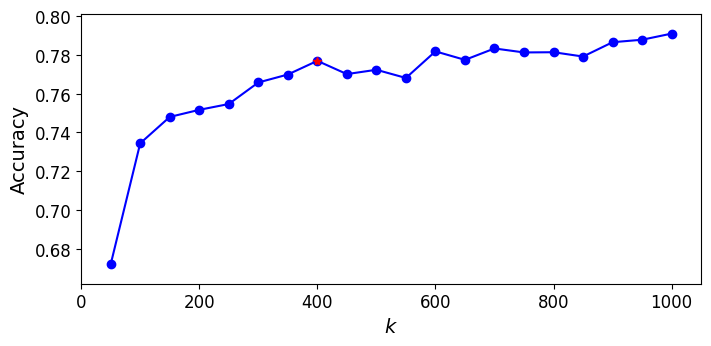

In [56]:
# The plot

plt.figure(figsize=(8, 3.5))
plt.plot([n for n in range(50, 1001, 50)], scores, 'bo-')
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)

plt.axis([0, 1050, np.min(scores) - 0.01, np.max(scores) + 0.01])
plt.plot(400, scores[7], 'r*')

plt.show()

Here also, the graph is not that promising. We can choose k = 400 as number of clusters by the same reason as earlier.

## SVM

We now do everything exactly as above, just with a Support Vector Classifier instead of a Logistic Regressor

In [57]:
from sklearn.svm import SVC

svc = SVC(random_state=42)
svc.fit(X_train_pca, y_train)
svc.score(X_test_pca, y_test)

0.8673333333333333

SVM after clustering

In [58]:
svc = SVC(random_state=42)
svc.fit(X_representative_digits, y_representative_digits)
svc.score(X_test_pca, y_test)

0.7733888888888889

SVM after propagation

In [59]:
svc = SVC(random_state=42)
svc.fit(X_train_pca, y_train_propagated)
svc.score(X_test_pca, y_test)

0.7896111111111112

SVM after 1% propogation

In [60]:
svc = SVC(random_state=42)
svc.fit(X_train_partially_propagated, y_train_partially_propagated)
svc.score(X_test_pca, y_test)

0.779

In [61]:
def k_cluster_3(k, p):
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=1,
                max_iter=400, random_state=42, )
    kmeans.fit(X_train_pca)
    X_digits_dist = kmeans.transform(X_train_pca)
    representative_digit_idx = np.argmin(X_digits_dist, axis = 0)
    X_representative_digits = X_train_pca[representative_digit_idx, :]
    X_representative_digits_np = np.array(X_representative_digits)
    
    y_representative_digits = y_train[representative_digit_idx]
    
    svc = SVC(random_state=42)
    svc.fit(X_representative_digits, y_representative_digits)
    print('Accuracy with', k, 'clusters =', svc.score(X_test_pca, y_test))
    
    y_train_propagated = np.empty(len(X_train_pca), dtype=np.int32)
    for i in range(k):
        y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]
    
    svc = SVC(random_state=1)
    svc.fit(X_train_pca, y_train_propagated)
    print('Accuracy with labells propagated =', svc.score(X_test_pca, y_test))
    
    percentile_closest = p
    
    X_cluster_dist = X_digits_dist[np.arange(len(X_train_pca)), kmeans.labels_]
    for i in range(k):
        in_cluster = (kmeans.labels_ == i)
        cluster_dist = X_cluster_dist[in_cluster]
        cutoff_distance = np.percentile(cluster_dist, percentile_closest)
        above_cutoff = (X_cluster_dist > cutoff_distance)
        X_cluster_dist[in_cluster & above_cutoff] = -1
    
    partially_propagated = (X_cluster_dist != -1)
    X_train_partially_propagated = X_train_pca[partially_propagated]
    y_train_partially_propagated = y_train_propagated[partially_propagated]
    
    print('Accuracy of percentage labels with actual labels =', np.mean(y_train_partially_propagated == y_train[partially_propagated]))
    
    svc = SVC(random_state=42)
    svc.fit(X_train_partially_propagated, y_train_partially_propagated)
    print('Accuracy with labells propagated to nearest', str(p)+'% elements =', svc.score(X_test_pca, y_test))

In [62]:
k_cluster_3(500, 10)

Accuracy with 500 clusters = 0.7782222222222223
Accuracy with labells propagated = 0.7913888888888889
Accuracy of percentage labels with actual labels = 0.8478555304740406
Accuracy with labells propagated to nearest 10% elements = 0.7976666666666666


In [63]:
def f(x, y, n):
    for k in range(x, y+1, n):
        kmeans = KMeans(n_clusters=k, init='k-means++', n_init=1,
                max_iter=400, random_state=42, )
        kmeans.fit(X_train_pca)
        X_digits_dist = kmeans.transform(X_train_pca)
        representative_digit_idx = np.argmin(X_digits_dist, axis = 0)
        X_representative_digits = X_train_pca[representative_digit_idx, :]
        X_representative_digits_np = np.array(X_representative_digits)
        
        y_representative_digits = y_train[representative_digit_idx]
        
        svc = SVC(random_state=42)
        svc.fit(X_representative_digits, y_representative_digits)
        scores.append(svc.score(X_test_pca, y_test))

In [64]:
scores = []

In [65]:
f(50, 1000, 50)

In [66]:
for i in range(len(scores)):
    print((i+1)*50 , "->", scores[i])

50 -> 0.6102777777777778
100 -> 0.6692777777777777
150 -> 0.7135555555555556
200 -> 0.7269444444444444
250 -> 0.7447777777777778
300 -> 0.7671111111111111
350 -> 0.7686111111111111
400 -> 0.7672222222222222
450 -> 0.7733888888888889
500 -> 0.7782222222222223
550 -> 0.7786666666666666
600 -> 0.783
650 -> 0.7852222222222223
700 -> 0.7865555555555556
750 -> 0.7891666666666667
800 -> 0.7853333333333333
850 -> 0.7883888888888889
900 -> 0.7904444444444444
950 -> 0.79
1000 -> 0.7946111111111112


In [67]:
50 + (np.argsort(scores)[::-1])*50

array([1000,  900,  950,  750,  850,  700,  800,  650,  600,  550,  500,
        450,  350,  400,  300,  250,  200,  150,  100,   50], dtype=int64)

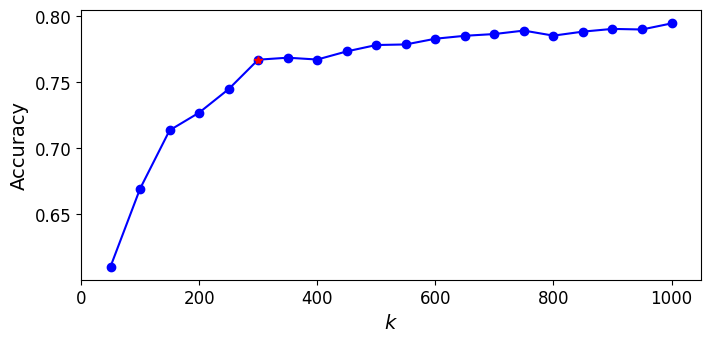

In [68]:
plt.figure(figsize=(8, 3.5))
plt.plot([n for n in range(50, 1001, 50)], scores, 'bo-')
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)

plt.axis([0, 1050, np.min(scores) - 0.01, np.max(scores) + 0.01])
plt.plot(300, scores[5], 'r*')

plt.show()

From the graph above, we can choose k = 300. After 300 clusters, the increase in accurcy is not that very much. Hence we get an accuracy of 76.72%

### Now, using this model on our original testing dataset

Clustering and Logistic Regression:

In [69]:
def k_cluster_1(k, p):
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=1,
                max_iter=400, random_state=42, )
    kmeans.fit(X_train_1)
    X_digits_dist = kmeans.transform(X_train_1)
    representative_digit_idx = np.argmin(X_digits_dist, axis = 0)
    X_representative_digits = X_train_1[representative_digit_idx, :]
    X_representative_digits_np = np.array(X_representative_digits)
    
    y_representative_digits = y_train_1[representative_digit_idx]
    
    log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=500, random_state=42)
    log_reg.fit(X_representative_digits, y_representative_digits)
    print('Accuracy with', k, 'clusters =', log_reg.score(X_test_1, y_test_1))
    
    y_train_propagated = np.empty(len(X_train_1), dtype=np.int32)
    for i in range(k):
        y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]
    
    log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=500, random_state=1)
    log_reg.fit(X_train_1, y_train_propagated)
    print('Accuracy with labells propagated =', log_reg.score(X_test_1, y_test_1))
    
    percentile_closest = p
    
    X_cluster_dist = X_digits_dist[np.arange(len(X_train_1)), kmeans.labels_]
    for i in range(k):
        in_cluster = (kmeans.labels_ == i)
        cluster_dist = X_cluster_dist[in_cluster]
        cutoff_distance = np.percentile(cluster_dist, percentile_closest)
        above_cutoff = (X_cluster_dist > cutoff_distance)
        X_cluster_dist[in_cluster & above_cutoff] = -1
    
    partially_propagated = (X_cluster_dist != -1)
    X_train_partially_propagated = X_train_1[partially_propagated]
    y_train_partially_propagated = y_train_propagated[partially_propagated]
    
    log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=500, random_state=42)
    log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
    print('Accuracy with labells propagated to nearest', str(p)+'% elements =', log_reg.score(X_test_1, y_test_1))

In [70]:
k_cluster_1(500, 10)

Accuracy with 500 clusters = 0.7872


c:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy with labells propagated = 0.7763
Accuracy with labells propagated to nearest 10% elements = 0.773


PCA, Clustering then Logistic Regression:

In [71]:
pca = PCA(n_components=t, random_state=42)
pca.fit(X_train_1)
X_train_1_pca = pca.transform(X_train_1)
X_test_1_pca = pca.transform(X_test_1)

In [72]:
def k_cluster_2(k, p):
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=1,
                max_iter=400, random_state=42, )
    kmeans.fit(X_train_1_pca)
    X_digits_dist = kmeans.transform(X_train_1_pca)
    representative_digit_idx = np.argmin(X_digits_dist, axis = 0)
    X_representative_digits = X_train_1_pca[representative_digit_idx, :]
    X_representative_digits_np = np.array(X_representative_digits)
    
    y_representative_digits = y_train_1[representative_digit_idx]
    
    log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=2000, random_state=42)
    log_reg.fit(X_representative_digits, y_representative_digits)
    print('Accuracy with', k, 'clusters =', log_reg.score(X_test_1_pca, y_test_1))
    
    y_train_propagated = np.empty(len(X_train_1_pca), dtype=np.int32)
    for i in range(k):
        y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]
    
    log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=2000, random_state=1)
    log_reg.fit(X_train_1_pca, y_train_propagated)
    print('Accuracy with labells propagated =', log_reg.score(X_test_1_pca, y_test_1))
    
    percentile_closest = p
    
    X_cluster_dist = X_digits_dist[np.arange(len(X_train_1_pca)), kmeans.labels_]
    for i in range(k):
        in_cluster = (kmeans.labels_ == i)
        cluster_dist = X_cluster_dist[in_cluster]
        cutoff_distance = np.percentile(cluster_dist, percentile_closest)
        above_cutoff = (X_cluster_dist > cutoff_distance)
        X_cluster_dist[in_cluster & above_cutoff] = -1
    
    partially_propagated = (X_cluster_dist != -1)
    X_train_partially_propagated = X_train_1_pca[partially_propagated]
    y_train_partially_propagated = y_train_propagated[partially_propagated]
    
    log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=2000, random_state=42)
    log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
    print('Accuracy with labells propagated to nearest', str(p)+'% elements =', log_reg.score(X_test_1_pca, y_test_1))

In [73]:
k_cluster_2(400, 10)

Accuracy with 400 clusters = 0.7565
Accuracy with labells propagated = 0.7619
Accuracy with labells propagated to nearest 10% elements = 0.7591


PCA, Clustering then SVM:

In [74]:
def k_cluster_3(k, p):
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=1,
                max_iter=400, random_state=42, )
    kmeans.fit(X_train_1_pca)
    X_digits_dist = kmeans.transform(X_train_1_pca)
    representative_digit_idx = np.argmin(X_digits_dist, axis = 0)
    X_representative_digits = X_train_1_pca[representative_digit_idx, :]
    X_representative_digits_np = np.array(X_representative_digits)
    
    y_representative_digits = y_train_1[representative_digit_idx]
    
    svc = SVC(random_state=42)
    svc.fit(X_representative_digits, y_representative_digits)
    print('Accuracy with', k, 'clusters =', svc.score(X_test_1_pca, y_test_1))
    
    y_train_propagated = np.empty(len(X_train_1_pca), dtype=np.int32)
    for i in range(k):
        y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]
    
    svc = SVC(random_state=1)
    svc.fit(X_train_1_pca, y_train_propagated)
    print('Accuracy with labells propagated =', svc.score(X_test_1_pca, y_test_1))
    
    percentile_closest = p
    
    X_cluster_dist = X_digits_dist[np.arange(len(X_train_1_pca)), kmeans.labels_]
    for i in range(k):
        in_cluster = (kmeans.labels_ == i)
        cluster_dist = X_cluster_dist[in_cluster]
        cutoff_distance = np.percentile(cluster_dist, percentile_closest)
        above_cutoff = (X_cluster_dist > cutoff_distance)
        X_cluster_dist[in_cluster & above_cutoff] = -1
    
    partially_propagated = (X_cluster_dist != -1)
    X_train_partially_propagated = X_train_1_pca[partially_propagated]
    y_train_partially_propagated = y_train_propagated[partially_propagated]
    
    svc = SVC(random_state=42)
    svc.fit(X_train_partially_propagated, y_train_partially_propagated)
    print('Accuracy with labells propagated to nearest', str(p)+'% elements =', svc.score(X_test_1_pca, y_test_1))

In [75]:
k_cluster_3(300, 10)

Accuracy with 300 clusters = 0.7564
Accuracy with labells propagated = 0.7612
Accuracy with labells propagated to nearest 10% elements = 0.7748


In summary, we are getting a maximum accuracy by Dimensionality Reduction into 25 attributes using PCA, then clustering into 300 clusters, and the manually labelling the elements nearest to centroids of each cluster and training an SVM model using them.$\\$
On the given training and testing sample, we are getting an accuracy of around 75.64%.$\\$
On propagation to nearest 20%, we get an even greater accuracy of 77.5%.